### Testing the correctness of the simulator (Hadamard gate)

In [2]:
from cqt_anyons import AnyonicCircuit
from IPython.display import Latex
from cplot import cplot

qc1 = AnyonicCircuit(1, 3)
colors = ['r', 'g', 'b']

# Hadamard sequence
had_sequence = [[1, 2], [2, 2], [1, -2], [2, -2], [1, 2], [2, 4], [1, -2], [2, 2],
                [1, 2], [2, -2], [1, 2], [2, -2], [1, 4]]
# NOT sequence
# not_sequence = [[1, -2], [2, -4], [1, 4], [2, -2], [1, 2], [2, 2], [1, -2], [2, 4], [1, -2], [2, 4],
#                [1, 2], [2, -4], [1, 2], [2, -2], [1, 2], [2, -2], [1, -2]]

qc1.braid_sequence(had_sequence)
qc1.measure()

for ind, (anyon, color) in enumerate(zip(qc1.drawer.anyons.values(), colors)):
    anyon.label = str(ind + 1)
    anyon.color = color


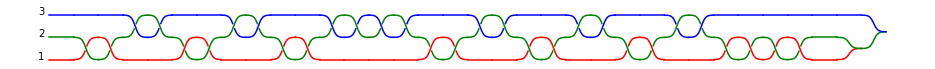

In [3]:
qc1.draw()

In [4]:
print(qc1.history('sigmas'))

['s1', 's1', 's2', 's2', 'is1', 'is1', 'is2', 'is2', 's1', 's1', 's2', 's2', 's2', 's2', 'is1', 'is1', 's2', 's2', 's1', 's1', 'is2', 'is2', 's1', 's1', 'is2', 'is2', 's1', 's1', 's1', 's1']


In [5]:
Latex(qc1.history(output = "latex"))

<IPython.core.display.Latex object>

In [6]:
print(qc1.unitary().round(decimals=3))

[[ 1.   -0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.004-0.71j  -0.003-0.704j]
 [ 0.   +0.j     0.003-0.704j  0.004+0.71j ]]


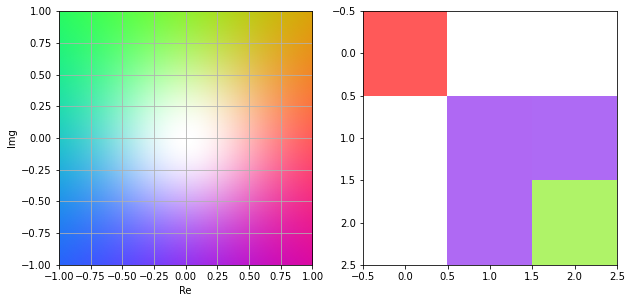

In [7]:
cplot(qc1.unitary())

### Testing the braiding sequence function

In [7]:
from cqt_anyons.circuit import AnyonicCircuit
from IPython.display import Latex

qc1 = AnyonicCircuit(1, 4)
qc2 = AnyonicCircuit(1, 4)

qc1.braid(2, 1).braid(2, 3).braid(2, 3).braid(2, 3).braid(1, 2).braid(1, 2)
qc2.braid_sequence([[1, -1], [2, 3], [1, 2]])

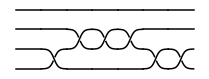

In [8]:
qc1.draw()

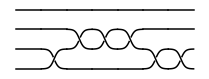

In [9]:
qc2.draw()

In [10]:
Latex(qc1.history(output = "latex"))

<IPython.core.display.Latex object>

In [11]:
Latex(qc2.history(output = "latex"))

<IPython.core.display.Latex object>

------------------------------ 

### 1st PR message (updated after the drawer update)

In [12]:
from cqt_anyons.circuit import AnyonicCircuit
import matplotlib.pyplot as plt
import numpy as np

qc = AnyonicCircuit(1, 4)

qc.initialize([1 / np.sqrt(2), 1 / np.sqrt(2), 0, 0, 0])

qc.braid(2, 1).braid(2, 3).braid(1, 2)

qc.measure()


In [13]:
qc.history()

[(2, 1), (2, 3), (1, 2)]

In [14]:
qc.history(output = "sigmas")

['s1', 'is2', 'is1']

In [15]:
from IPython.display import Latex
Latex(qc.history(output = "latex"))

<IPython.core.display.Latex object>

In [21]:
qc.drawer.anyons[2].label = "Beautiful Anyon"
qc.drawer.anyons[1].color = "blue" # the anyon that ends at position 1
qc.drawer.anyons[4].color = "red"
qc.drawer.anyons[3].color = "green"

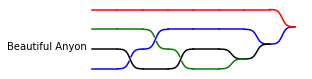

In [22]:
qc.draw()

In [23]:
qc.unitary()

array([[-0.5       -3.63271264e-01j,  0.78615138-2.77555756e-16j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [-0.63600982-4.62088186e-01j, -0.61803399-2.77555756e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        -0.30901699-9.51056516e-01j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, -0.5       -3.63271264e-01j,
         0.78615138-2.77555756e-16j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j, -0.63600982-4.62088186e-01j,
        -0.61803399-2.77555756e-17j]])

In [24]:
qc.statevector()

array([[ 0.20233958-0.25687157j],
       [-0.88674288-0.32674569j],
       [ 0.        +0.j        ],
       [ 0.        +0.j        ],
       [ 0.        +0.j        ]])

In [25]:
qc.run()

{'counts': {'0': 121, '1': 903}, 'memory': array([1, 1, 1, ..., 1, 1, 1])}